### Libraries
We will use Open-CV for reading the image, pandas to display the data as DataFrames, numpy for the array capabilities and matPlotLib for displaying the images and plotting graphs

##### Data Frames
We can better visualize out data using pandas library to view the array as a table each would represent a pixel value

##### Numpy 
Numpy allows for faster array processing than the python built in data types because it uses C/C++ under the hood

##### Matplotlib
This is the standard library for data visualization and plotting, it also has support for plotting images which we will use

##### Open-CV
This libraries was developed by Intel in 1999 for image processing and manipulation in 2012 the library was taken over by a non-profit open-cv.org, it is wirtten in C++ and there is a language binding for python. Keynote this library uses BGR (Blue, Green, Red) instead iof the conventional RGB (Red, Green, Blue).

In [36]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Open the image with open-cv and plot with matplotlib, the image is a pixelated version of a larger image this is done to speed up and simplify the process this code is just for demonstration purpose

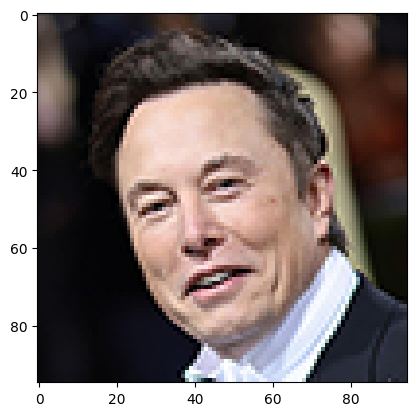

In [37]:
IMG_PATH = '95x95-image.png'
img = cv2.imread(IMG_PATH)  # Reading the Image

img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)

In Our Image we have a (95, 95, 3) array the first two values represent the dimensions (width and height) of the image, the third value represent the number of the channel in the images which is 3 as expected Our image should to converted into a single channel image (Gray-scale image)

In [38]:
print(img.shape)  # Original image

(95, 95, 3)


##### Gray Scale
We can get the gray scale version of the image programmatically or use the open-cv built in function which is more accurate, to increase the accuracy of our code we should consider adjusting the gamma value for our example we are ignoring it (gamma = 1)

In [39]:
# Simple Algo
gray_img = img[:,:,0]*0.114 + img[:,:,0]*0.587 + img[:,:,0]*0.299
pd.DataFrame(gray_img).iloc[:10, :10].style

,0,1,2,3,4,5,6,7,8,9
0,64.000000,66.000000,61.000000,53.000000,41.000000,41.000000,45.000000,41.000000,39.000000,37.000000
1,80.000000,77.000000,68.000000,57.000000,49.000000,43.000000,45.000000,42.000000,41.000000,40.000000
2,79.000000,80.000000,71.000000,60.000000,54.000000,45.000000,41.000000,41.000000,48.000000,47.000000
3,76.000000,79.000000,70.000000,62.000000,60.000000,49.000000,42.000000,44.000000,48.000000,38.000000
4,73.000000,72.000000,66.000000,62.000000,61.000000,52.000000,44.000000,41.000000,34.000000,25.000000
5,65.000000,61.000000,59.000000,56.000000,53.000000,46.000000,35.000000,29.000000,25.000000,24.000000
6,56.000000,55.000000,56.000000,53.000000,50.000000,43.000000,31.000000,27.000000,28.000000,27.000000
7,51.000000,57.000000,58.000000,53.000000,50.000000,49.000000,42.000000,32.000000,28.000000,25.000000
8,48.000000,54.000000,61.000000,57.000000,55.000000,53.000000,44.000000,32.000000,27.000000,25.000000
9,51.000000,52.000000,58.000000,61.000000,63.000000,59.000000,43.000000,30.000000,27.000000,24.000000


In [40]:
# Open CV Algo
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
pd.DataFrame(gray_img).iloc[:10, :10].style

,0,1,2,3,4,5,6,7,8,9
0,71,69,63,52,36,32,34,34,34,33
1,84,80,71,60,45,34,35,38,38,34
2,85,83,75,64,55,39,34,37,41,40
3,82,82,74,66,60,46,36,39,42,32
4,79,77,70,64,63,52,38,35,29,19
5,72,68,65,63,60,49,32,23,20,20
6,63,63,63,62,58,47,30,22,23,23
7,57,63,65,62,59,53,38,25,23,21
8,56,62,66,65,64,59,43,26,21,20
9,61,64,68,72,70,65,47,27,20,19


##### Integral Images

Take note that the numeric representation is int 32 to avoid overflow when later we do arythmic operations the default value is int8 as the pixel values only goes up to 255 this is a conscious decision by cv2 lib but we will need a larger range

2^8 = 256
0 -> 255

2^32 = 4_294_967_296
0 -> 4_294_967_295

In [41]:
integral_img = gray_img.astype('int32')

Summing all the rows

In [42]:
for i in range(gray_img.shape[0]):
    if i == 0:
        integral_img[i] = gray_img[i]
    else:
        integral_img[i] = gray_img[i] + integral_img[i-1]  # Columns

pd.DataFrame(integral_img).iloc[:10, :10].style

,0,1,2,3,4,5,6,7,8,9
0,71,69,63,52,36,32,34,34,34,33
1,155,149,134,112,81,66,69,72,72,67
2,240,232,209,176,136,105,103,109,113,107
3,322,314,283,242,196,151,139,148,155,139
4,401,391,353,306,259,203,177,183,184,158
5,473,459,418,369,319,252,209,206,204,178
6,536,522,481,431,377,299,239,228,227,201
7,593,585,546,493,436,352,277,253,250,222
8,649,647,612,558,500,411,320,279,271,242
9,710,711,680,630,570,476,367,306,291,261


summing all the columns

In [43]:
for i in range(gray_img.shape[1]):
    if i == 0:
        continue
    else:
        integral_img[:,i] = integral_img[:,i] + integral_img[ :,i-1]  # Columns

pd.DataFrame(integral_img).iloc[:10, :10].style

,0,1,2,3,4,5,6,7,8,9
0,71,140,203,255,291,323,357,391,425,458
1,155,304,438,550,631,697,766,838,910,977
2,240,472,681,857,993,1098,1201,1310,1423,1530
3,322,636,919,1161,1357,1508,1647,1795,1950,2089
4,401,792,1145,1451,1710,1913,2090,2273,2457,2615
5,473,932,1350,1719,2038,2290,2499,2705,2909,3087
6,536,1058,1539,1970,2347,2646,2885,3113,3340,3541
7,593,1178,1724,2217,2653,3005,3282,3535,3785,4007
8,649,1296,1908,2466,2966,3377,3697,3976,4247,4489
9,710,1421,2101,2731,3301,3777,4144,4450,4741,5002


### Haar Feature 
We can use a 5 by 5 array but note that the size would change over each step

In [44]:
haar_ft_1 = np.zeros((5, 5), dtype=np.int32)
haar_ft_2 = np.ones((5, 5), dtype=np.int32)

haar_ft = np.concatenate((haar_ft_1, haar_ft_2), axis=1)
pd.DataFrame(haar_ft).style 

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,1,1,1,1
1,0,0,0,0,0,1,1,1,1,1
2,0,0,0,0,0,1,1,1,1,1
3,0,0,0,0,0,1,1,1,1,1
4,0,0,0,0,0,1,1,1,1,1


##### Calc values using regular images

In [45]:
black_value = 0
white_value = 0

for i in range(haar_ft.shape[0]):
    for j in range(haar_ft.shape[1]):
        if haar_ft[i][j] == 0:
            black_value += gray_img[i][j]
        elif haar_ft[i][j] == 1:
            white_value += gray_img[i][j]

print(f"black_value: {black_value}\nWhite_value: {white_value}")
print(f"the difference in brightness is {abs(black_value-white_value)}")

        

black_value: 1710
White_value: 905
the difference in brightness is 805


##### Calc values using Integral images
We only need for operation per region

In [46]:
w, h = haar_ft_1.shape[0] - 1, haar_ft_1.shape[1] - 1
slider_x, slider_y = w, h

if w == slider_x and h == slider_y:
    black_value = integral_img[slider_x, slider_y]
elif h == slider_y:
    black_value = integral_img[slider_x, slider_y] - integral_img[slider_x, slider_y - h - 1]
elif w == slider_x:
    black_value = integral_img[slider_x, slider_y] - integral_img[slider_x - w - 1, slider_y] 
else:
    black_value = integral_img[slider_x + w, slider_y + h] \
                - integral_img[slider_x + w, slider_y - h -1] \
                - integral_img[slider_x - w -1, slider_y + h] \
                + integral_img[slider_x - w -1, slider_y - h -1]

print(f"black_value: {black_value}")

black_value: 1710
